# Tutorial de Regresión Logística

Basado en el notebook incluido en http://www.dataschool.io/guide-to-logistic-regression/


## Temas

1. Predicción de Valores continuos (Regresión Lineal)
2. Predicción de una variable Categórica
3. Usando Regresión Logistica
4. Probabilidades, odds ratio, e, log, log-odds
5. Qué es la Regresión Logística?
6. Interpretando los coeficientes de la Regresión Logistica
7. Usando regresión Logística con variables Categoricas
8. Conclusiones

Para recomendaciones sobre clasificadores, ver: http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/

## Parte 1: Predicción de valores continuos

In [2]:
# Dataset glass 
# https://archive.ics.uci.edu/ml/datasets/glass+identification
# http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
# usaremos Pandas para leer los datos 
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

glass.shape

(214, 10)

In [3]:
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


**Pregunta:** Imaginemos que queremos predecir el indice de refracción **ri**, y la única variable que tenemos es  **al**. Como podemos hacerlo?

**Rta.:** Este sería un problema de Regresión Lineal usando **al** como la única variable y **ri** como la salida.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

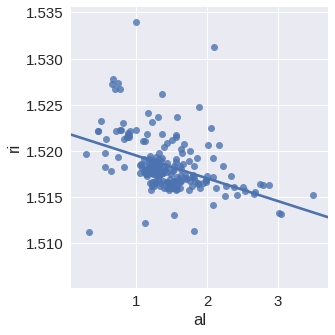

In [5]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

**Pregunta:** Como hacerlo sin Seaborn?

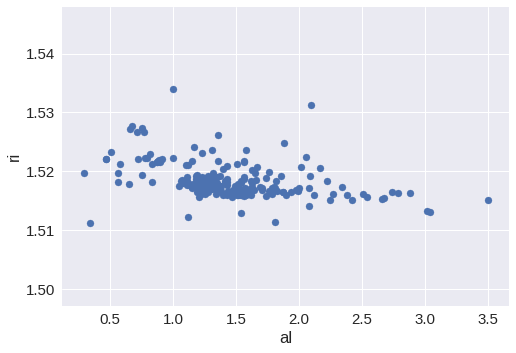

In [6]:
# Con Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [7]:
# Hacemos una regresión lineal simple usando sklearn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Hacemos predicciones para todos los valores de X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


In [9]:
# ploteamos las predicciones
#plt.plot(glass.al, glass.ri_pred, color='red')
#plt.xlabel('al')
#plt.ylabel('Predicted ri')

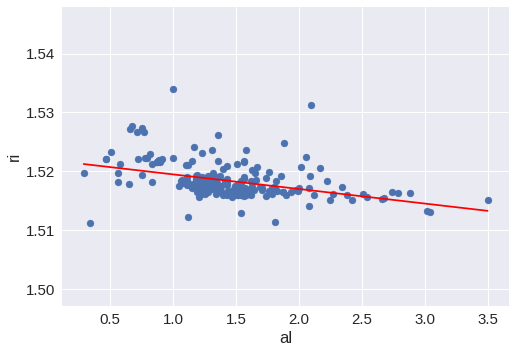

In [10]:
# Ploteamos los puntos y las predicciones
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

### Interpretación de los coeficientes de la regresión lineal

Ecuación de la Regresión Lineal: $y = \beta_0 + \beta_1x$

In [11]:
# Calculamos la predicción para al=2 usando la ecuación:
linreg.intercept_ + linreg.coef_ * 2

array([ 1.51699012])

In [12]:
# Calculamos la predicción para al=2 usando el método predict():
linreg.predict(2)

array([ 1.51699012])

In [13]:
# Vemos los coeficientes...
zip(feature_cols, linreg.coef_)

[('al', -0.0024776063874696235)]

**Interpretación:** Una unidad de incremento en 'al' genera un decremento de 0.0025 unidades en **'ri'**.

In [14]:
# Incrementando 'al' en 1 (es decir al=3) decrementa 'ri' en 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [15]:
# Lo mismo con el metodo predict() para 'al' = 3
linreg.predict(3)

array([ 1.51451251])

## Parte 2: Predicción de una variable Categórica

In [16]:
# Examinamos glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [17]:
# Los tipos 1, 2, 3 son vidrios de ventana
# Tipos 5, 6, 7 vidrios de casa (household)
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Ahora queremos predecir la variable categórica binaria **household** usando la variable **al**. 

Veamos la la relación entre estas variables:

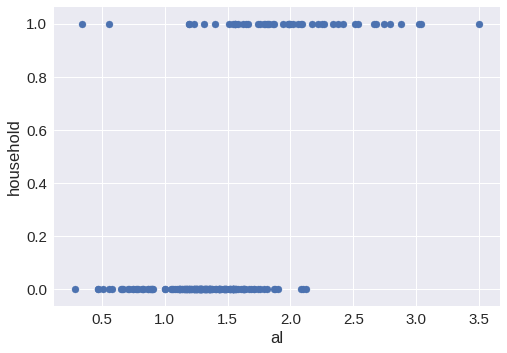

In [18]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Graficamos la recta de **Regresion Lineal**:

In [19]:
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

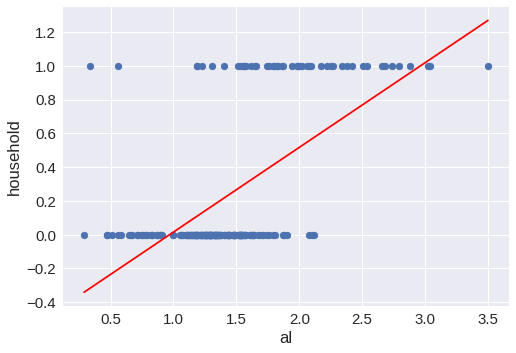

In [20]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

Si **al=3**, que clase predecimos para "household"? **1**

Si **al=1.5**, que clase predecimos para "household"? **0**

Cual sería el valor de "corte"? Cerca de **al=2**, porque es donde la línea de Regresión Lineal cruza el punto medio entre las clases 0 y 1.

Por lo tanto, diremos que para **household_pred >= 0.5**, predeciremos **1**, de lo contrario predeciremos la clase  **0**.

#### Una propiedad interesante de numpy es np.where

In [21]:
# Entendiendo como aplicar np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where devuelve el primer valor si la condición es True, y el segundo valor si la condición es False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [22]:
# Entonces podemos usar np.where para transformar un valor entre 0 y 1 en una clase u otra dependiendo
# de un umbral (por ej. 0.5)
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


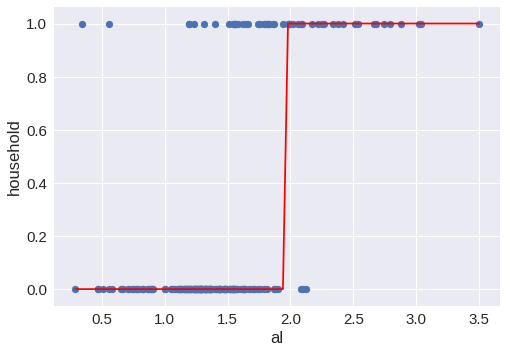

In [23]:
# ploteamos las predicciones 
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Parte 3: Usando Regresión Logistica

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X, y)

glass['household_pred_class'] = logreg.predict(X)

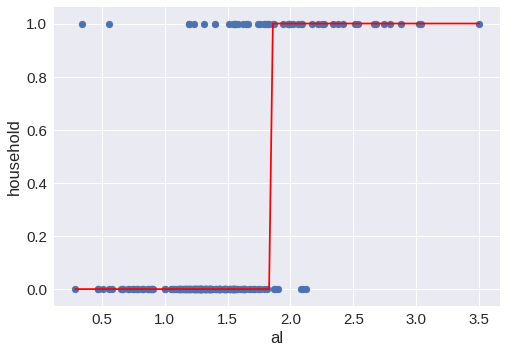

In [25]:
# ploteamos las predicciones
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

Y si quisieramos ver las **probabilidades de la predicción** en vez de la **clase de la predicción**? (particularmente para entender cuan cerca están del umbral)

In [26]:
# Lo mismo pero usamos predict_proba(X)
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

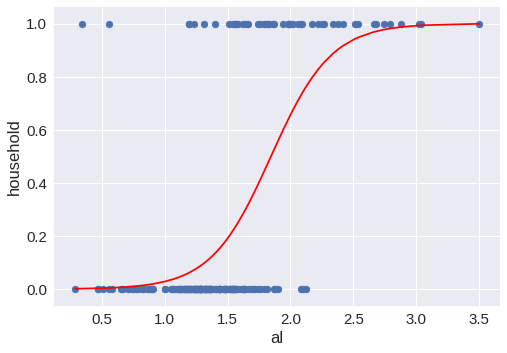

In [27]:
# ploteamos las predicciones para 'al'
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [28]:
# Vemos algunas predicciones de ejemplo
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


La primera columna indica la probabilidad predicha de la **clase 0**, indica la correspondiente de la **clase 1**.

## Parte 4: Probabilidades, odds ratio, e, log, log-odds

El término inglés odds ratio se ha traducido al español (castellano) de muchas maneras: razón de productos cruzados, razón de ventajas, razón de momios, desigualdad relativa.

$$probabilidad = \frac {una\ salida} {todas\ las\ salidas}$$

$$odds\ ratio = \frac {una\ salida} {todas\ las\ otras\ salidas}$$

Ejemplos:

- Lanzamos un dado y sale 1: probabilidad = 1/6, odds ratio = 1/5
- Lanzar un dado y sale par: probabilidad = 3/6, odds ratio = 3/3 = 1
- Lanzar un dado y sea menor que 5: probabilidad = 4/6, odds ratio = 4/2 = 2

$$odds\ ratio = \frac {probabilidad} {1 - probabilidad}$$

$$probabilidad = \frac {odds\ ratio} {1 + odds\ ratio}$$

In [29]:
# creamos una table que muestre la relación entre probabilidad y odds ratio
import pandas as pd
table = pd.DataFrame({'probabilidad':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds_ratio'] = table.probabilidad/(1 - table.probabilidad)
table

,probabilidad,odds_ratio
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


## Parte 5: Qué es la Regresión Logística?

**Regresión Lineal:** la respuesta continua se modela como una combinación lineal de las variables:

$$y = \beta_0 + \beta_1x$$

**Regresión Logística:** log-odds de una respuesta categórica que es "true" (1) se modela como una combinación lineal de las características:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

Esta es la llamada **función logit**, y puede escribirse de otra manera, en lo que llamamos la **función logistica**:

$$p = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

En otras palabras:

- La Regresión Logistica nos devuelve las **probabilidades de una clase específica**
- Estas probabilidades pueden ser convertidas o interpretadas como **predicciones de clase**

Propiedades de la **función logistic** :

- Tiene una forma "s" que puede suavizarse en función de los coeficientes
- La salida está entre 0 y 1

En este caso vamos a mostrar como funciona para problemas de **clasificación binaria**, pero también existen soluciones para problemas de **clasificación multi-clase**.

- El método típico es **"one-vs-all"** (también llamado**"one-vs-rest"**): descompone el problema en varios problemas de clasificación binaria. 
- Otro método es la **Regresión Logistica Multinomial** que puede resolverlo como un único problema.
- En Redesde Neuronales puede usarse Softmax.
- Uno de los mas usados es SVM.


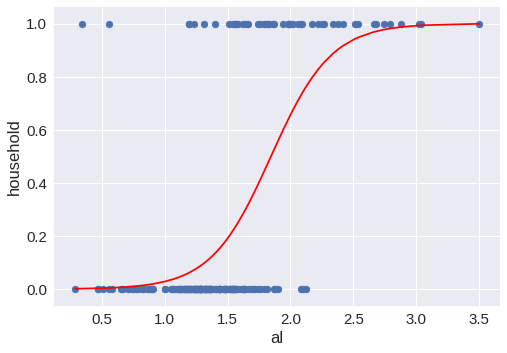

In [30]:
# ploteamos las predicciones usando los puntos de entrada 'al' y los valores de 'household' como salida (0 o 1)
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [31]:
# calculamos las predicciones log-odds para 'al'=2 usando la ecuación
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([ 0.64722323])

In [32]:
# convertimos log-odds en el odds-ratio
odds = np.exp(logodds)
odds

array([ 1.91022919])

In [33]:
# convertimos el odds-ratio en probabilidad
prob = odds/(1 + odds)
prob

array([ 0.65638445])

In [34]:
# Hacemos lo mismo pero usando el metodo predict_proba para 'al'=2
logreg.predict_proba(2)[:, 1]

array([ 0.65638445])

In [35]:
# Vemos el coeficiente para 'al'
zip(feature_cols, logreg.coef_[0])

[('al', 4.1804038614510901)]

**Interpretación:** Una unidad de incremento en 'al' se asocia con 4.18 unidades de incremento en el log-odds de 'household'.

In [36]:
# incrementando 'al' en 1 (i.e. al=3) incrementa el log-odds en 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [37]:
# Calculamos la prediccion de probabilidad para al=3 usando el método predict_proba()
logreg.predict_proba(3)[:, 1]

array([ 0.99205808])

**Conclusión:** Coeficientes positivos incrementan el log-odds de la respuesta (y por lo tanto incrementan la probabilidad), y coeficientes negativos hacen lo contrario.

In [38]:
# Veamos el interceptor...
logreg.intercept_

array([-7.71358449])

**Interpretación:** Para un valor 'al'= 0, el log-odds de 'household' es -7.71.

In [39]:
# convertimos el log-odds a probabilidad
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.00044652])

Es un evento muy poco probable. Esto tiene sentido porque la probabilidad de que 'household'=1 es muy baja cuando 'al'=0.

### Interpretación gráfica de los coeficientes

![Logistic regression beta values](logistic_betas.png)

Cambiando el valor $\beta_0$ desplaza la curva **horizontalmente**, mientras que si cambia el valor $\beta_1$  cambia la **pendiente** de la curva.

## Parte 7: Usando regresión Logística con variables Categoricas

Hasta ahora hemos usado la variable continua 'al', pero la Regresión Logistica puede usarse también con variables  **categóricas**:

In [47]:
# Creamos una variable categorica con 'ba'
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)
print "Numero de muestras de 'ba': ", len(glass['high_ba'])

Numero de muestras de 'ba':  214


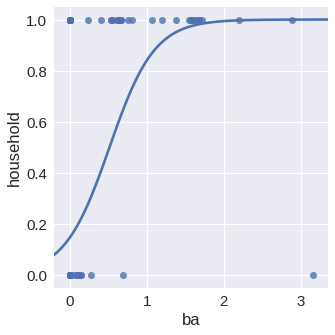

In [53]:
# Si ploteamos la original continua - activando la regresion logistica
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

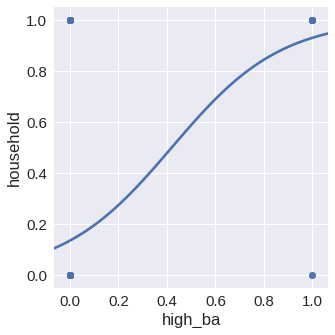

In [44]:
# Ahora ploteamos como quedó la variable categorica
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

Como era de esperar la variable independiente solo toma los valores 0 o 1 y la dependiente lo mismo.Pero todas las muestras han quedado concentradas en 4 puntos. 

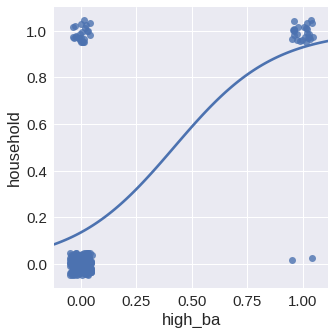

In [50]:
# Agregamos un poco de jitter para separarlas
sns.lmplot(x='high_ba', y='household', data=glass, ci=0.3, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [54]:
# Entrenamos un modelo de Regresion Logistica con estos datos
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [55]:
# obtenemos los coeficientes...
zip(feature_cols, logreg.coef_[0])

[('high_ba', 4.4273153450187195)]

**Interpretation:** Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

## Conclusiones - Regresión Logistica comparada con otros modelos

Ventajas:

- Muy interpretable (si sabemos como)
- Entrenamiento rápido
- No requiere muchos hiperparámetros (solo regularización)
- No es necesario escalar las features
- Funciona bien para un número pequeño de muestras

Desventajas:

- Asume una relación lineal entre las features y el log-odds de la respuesta.
- Su performance no es la mejor si la comparamos con los mejores métodos actuales
- No aprende automaticamente las relaciones entre las features